#**About Dataset:** 

Analysis of te company that reached the maximum price intraday.

Thesis: Is it worth investing in a company that has reached the maximum price intraday? Are there any grounds to invest in it?

The analyzed data changes every day as the company that has reached the maximum price changes.

We can analyze a different company every day.

Dataset is Yahoo Finance. At Yahoo Finance, we get free stock quotes, the latest news, portfolio management resources, international market data, social interaction and mortgage rates to help you manage your financial.

#Importing data

In [ ]:
!pip install yahoo-fin
!pip install requests-html

In [ ]:
!pip install yahoo_fin --upgrade

#Importing dependencies

In [ ]:
!pip install pmdarima

In [4]:
import yahoo_fin.stock_info as yh
import yahoo_fin.stock_info as si
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import time
from datetime import date, timedelta
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import io

import pmdarima as pm
from pandas.plotting import lag_plot

%matplotlib inline
register_matplotlib_converters()

from pmdarima.arima import ndiffs
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

#Company review


In [5]:
response = yh.get_day_gainers()

In [6]:
response.head()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,TASK,"TaskUs, Inc.",21.17,5.12,31.95,1971000.0,534614.0,2.078000e+09,39.93
1,FIVN,"Five9, Inc.",56.05,9.05,19.26,4908000.0,1261000.0,3.929000e+09,NaN
2,AAON,"AAON, Inc.",77.02,11.47,17.50,204681.0,140539.0,4.111000e+09,74.78
3,SEDG,"SolarEdge Technologies, Inc.",247.60,36.30,17.18,2109000.0,1008000.0,1.427700e+10,103.17
4,IGT,International Game Technology PLC,23.27,3.32,16.67,1469000.0,1333000.0,4.708000e+09,30.23


In [7]:
response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             100 non-null    object 
 1   Name               100 non-null    object 
 2   Price (Intraday)   100 non-null    float64
 3   Change             100 non-null    float64
 4   % Change           100 non-null    float64
 5   Volume             100 non-null    float64
 6   Avg Vol (3 month)  100 non-null    float64
 7   Market Cap         100 non-null    float64
 8   PE Ratio (TTM)     67 non-null     float64
dtypes: float64(7), object(2)
memory usage: 7.2+ KB


In [8]:
response.columns

Index(['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Volume',
       'Avg Vol (3 month)', 'Market Cap', 'PE Ratio (TTM)'],
      dtype='object')

In [9]:
response['Symbol'].unique()

array(['TASK', 'FIVN', 'AAON', 'SEDG', 'IGT', 'OSH', 'VRNS', 'LTMAQ',
       'AXSM', 'RADLY', 'SPWR', 'PLNT', 'SANM', 'PTVE', 'DNA', 'GFI',
       'SMG', 'CERT', 'KSS', 'LPL', 'WELL', 'FN', 'PWSC', 'GFS', 'HUBS',
       'TAC', 'OR', 'KD', 'NU', 'ARRY', 'BCLYF', 'ZHEXF', 'DKNG', 'DD',
       'FOUR', 'EXPD', 'BLDR', 'SGML', 'TROX', 'AEM', 'GOLD', 'NEM',
       'CSIQ', 'SQM', 'XM', 'PACB', 'TDC', 'PCCYF', 'ASH', 'NOVA', 'AU',
       'WOLF', 'ALB', 'UNICY', 'DASH', 'AUY', 'DIOD', 'LTHM', 'PANW',
       'LSRCY', 'RKT', 'RLLCF', 'IFNNY', 'FNV', 'FRSH', 'TEAM', 'BSY',
       'WPM', 'PAAS', 'ESTC', 'AFRM', 'AGI', 'PYPL', 'GNRC', 'LUMN',
       'NXST', 'FTNT', 'QGEN', 'TENB', 'GRFS', 'DISH', 'CLPBY', 'RGLD',
       'AMGN', 'SHCAY', 'ARVN', 'ALHC', 'DT', 'KGC', 'BTG', 'ABNB', 'AG',
       'NTR', 'CNHI', 'LAC', 'FQVLF', 'RUN', 'TXG', 'HSQVY', 'EXAS'],
      dtype=object)

In [10]:
response.describe()

,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,67.000000
mean,48.437021,3.888886,8.802700,3.266357e+06,3.714534e+06,1.649495e+10,112.058806
std,60.937830,5.389198,3.660461,5.922967e+06,5.835938e+06,2.809705e+10,582.444736
min,0.007500,0.000500,5.700000,1.964900e+04,2.443000e+03,2.055000e+09,0.420000
25%,11.770000,0.810000,6.780000,3.958378e+05,6.786432e+05,3.533500e+09,11.305000
50%,28.190000,2.175000,7.780000,1.306000e+06,1.512000e+06,5.908000e+09,22.530000
75%,63.287500,5.365000,9.247500,3.374000e+06,3.473750e+06,1.757025e+10,50.240000
max,308.020000,36.300000,31.950000,4.243400e+07,3.103300e+07,1.635050e+11,4787.500000


**Which company has reached the maximum price today?**

In [11]:
px.bar(data_frame=response.sort_values('Symbol'), x='Symbol', y='Price (Intraday)', title='Increases of companies on a given day',
      text_auto=True, color='Symbol', hover_data=['Name', 'Volume']) 

**I check the company that has the highest growth during the day.**

In [12]:
max_day = response['Price (Intraday)'].max()
max_day

308.02

In [13]:
df = response['Price (Intraday)'].idxmax()
df

52

In [14]:
name_max_day = response.loc[df , 'Symbol']
name_max_day


'ALB'

# EARNINGS HISTORY WITH ACTUAL / EXPECTED EPS INFORMATION

I check the history of the ernings of the company that increased the maximum price intraday whether there are grounds to invest in it.

In [15]:
history_earnings = si.get_earnings_history(name_max_day) 
history_earnings

[{'ticker': 'ALB',
  'companyshortname': 'Albemarle Corp',
  'eventname': 'Q3 2023  Earnings Release',
  'startdatetime': '2023-10-31T10:59:00.000Z',
  'startdatetimetype': 'TNS',
  'epsestimate': None,
  'epsactual': None,
  'epssurprisepct': None,
  'timeZoneShortName': 'EDT',
  'gmtOffsetMilliSeconds': -14400000,
  'quoteType': 'EQUITY'},
 {'ticker': 'ALB',
  'companyshortname': 'Albemarle Corp',
  'eventname': 'Q2 2023  Earnings Release',
  'startdatetime': '2023-08-01T10:59:00.000Z',
  'startdatetimetype': 'TNS',
  'epsestimate': None,
  'epsactual': None,
  'epssurprisepct': None,
  'timeZoneShortName': 'EDT',
  'gmtOffsetMilliSeconds': -14400000,
  'quoteType': 'EQUITY'},
 {'ticker': 'ALB',
  'companyshortname': 'Albemarle Corp',
  'eventname': 'Q1 2023  Earnings Release',
  'startdatetime': '2023-05-02T10:59:00.000Z',
  'startdatetimetype': 'TNS',
  'epsestimate': None,
  'epsactual': None,
  'epssurprisepct': None,
  'timeZoneShortName': 'EDT',
  'gmtOffsetMilliSeconds': -1440

**To extract the company's IPO date, it will write earnings histories to DataFrame**

In [16]:
df_history_earnings = pd.DataFrame.from_dict(history_earnings) 

In [17]:
df_history_earnings.set_index('startdatetime') 

,ticker,companyshortname,eventname,startdatetimetype,epsestimate,epsactual,epssurprisepct,timeZoneShortName,gmtOffsetMilliSeconds,quoteType
startdatetime,,,,,,,,,,
2023-10-31T10:59:00.000Z,ALB,Albemarle Corp,Q3 2023 Earnings Release,TNS,NaN,NaN,NaN,EDT,-14400000,EQUITY
2023-08-01T10:59:00.000Z,ALB,Albemarle Corp,Q2 2023 Earnings Release,TNS,NaN,NaN,NaN,EDT,-14400000,EQUITY
2023-05-02T10:59:00.000Z,ALB,Albemarle Corp,Q1 2023 Earnings Release,TNS,NaN,NaN,NaN,EDT,-14400000,EQUITY
2023-02-14T10:59:00.000Z,ALB,Albemarle Corp,Q4 2022 Earnings Release,TNS,7.79,NaN,NaN,EST,-18000000,EQUITY
2022-11-03T13:00:00.000Z,ALB,Albemarle Corp,Q3 2022 Earnings Call,TAS,6.99,7.50,7.30,EDT,-14400000,EQUITY
...,...,...,...,...,...,...,...,...,...,...
2000-07-18T04:00:00.000Z,ALB,Albemarle Corporation,None,TAS,0.22,0.26,18.60,EDT,-14400000,EQUITY
2000-04-17T04:00:00.000Z,ALB,Albemarle Corporation,None,TAS,0.25,0.31,22.82,EDT,-14400000,EQUITY
2000-01-20T05:00:00.000Z,ALB,Albemarle Corporation,None,TAS,0.21,0.26,21.43,EST,-18000000,EQUITY


**The first stock exchange listing of the company**

In [18]:
start_day = df_history_earnings['startdatetime'].min()
start_day

'1999-07-16T04:00:00.000Z'

#HISTORY OF THE COMPANY'S EARNINGS TO THIS DAY

In [19]:
today = date.today()
end_date = today.isoformat()
end_date

'2022-11-08'

In [20]:
earnings_history_to_date = yh.get_data(name_max_day, start_day , end_date, index_as_date = True) 

df=pd.DataFrame(earnings_history_to_date)
df

,open,high,low,close,adjclose,volume,ticker
1999-07-16,9.656250,10.000000,9.500000,10.000000,6.873358,183400,ALB
1999-07-19,9.937500,10.000000,9.531250,9.843750,6.765959,180000,ALB
1999-07-20,9.781250,9.781250,9.468750,9.531250,6.551167,78400,ALB
1999-07-21,9.562500,9.562500,9.250000,9.375000,6.443769,376200,ALB
1999-07-22,9.312500,9.468750,8.875000,9.468750,6.508207,299600,ALB
...,...,...,...,...,...,...,...
2022-11-01,285.660004,287.880005,278.890015,279.000000,279.000000,1276200,ALB
2022-11-02,276.179993,279.500000,265.500000,266.519989,266.519989,1594800,ALB
2022-11-03,253.000000,278.500000,250.500000,274.559998,274.559998,2240900,ALB
2022-11-04,283.890015,286.739990,275.440002,284.989990,284.989990,1480500,ALB


In [21]:
df.tail(5)

,open,high,low,close,adjclose,volume,ticker
2022-11-01,285.660004,287.880005,278.890015,279.000000,279.000000,1276200,ALB
2022-11-02,276.179993,279.500000,265.500000,266.519989,266.519989,1594800,ALB
2022-11-03,253.000000,278.500000,250.500000,274.559998,274.559998,2240900,ALB
2022-11-04,283.890015,286.739990,275.440002,284.989990,284.989990,1480500,ALB
2022-11-07,286.820007,288.279999,281.679993,286.489990,286.489990,870700,ALB


**The volume (turnover) represents the activity of investors within a specific time frame. Each volume unit reflects the behavior of buyers and sellers.**

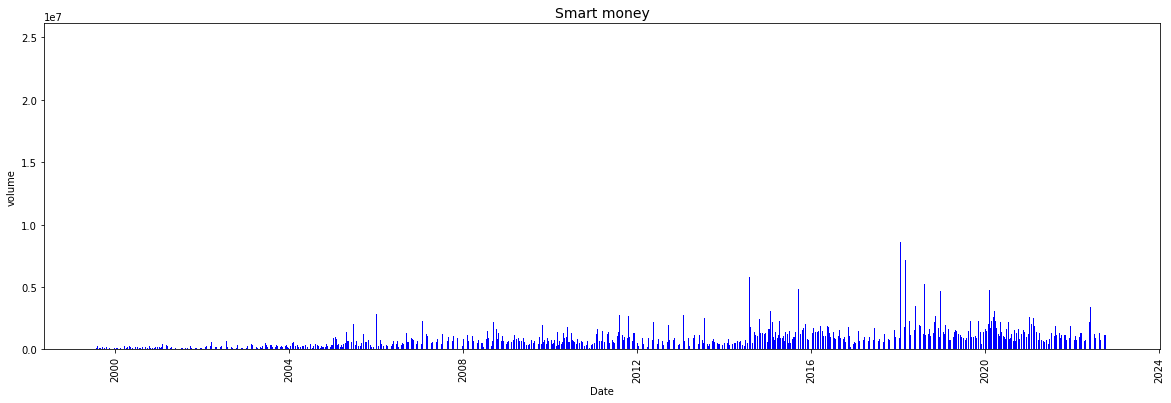

In [22]:
fig, ax=plt.subplots(figsize=(20,6))

ax.bar(df.index, df['volume'], color='b')
ax.set_xlabel('Date')
ax.set_ylabel('volume')
ax.set_title('Smart money', fontsize=14)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

The height of the bar reflects the volume, i.e. the higher the bar, the higher the turnover. The volume analysis allows you to understand the source of the price change and find places where large capital is involved in the game. The sharp increase in volume confirms that there is a lot of capital in the game, which does not intend to sell shares at the first better correction.

**To make the chart more readable, I will illustrate the volume from the last 3 months.**

In [23]:
three_months_ago = today - timedelta(days=90)
three_months_ago = three_months_ago.isoformat()
three_months_ago

'2022-08-10'

In [24]:
earnings_history_three_months = yh.get_data(name_max_day, three_months_ago , end_date, index_as_date = True)

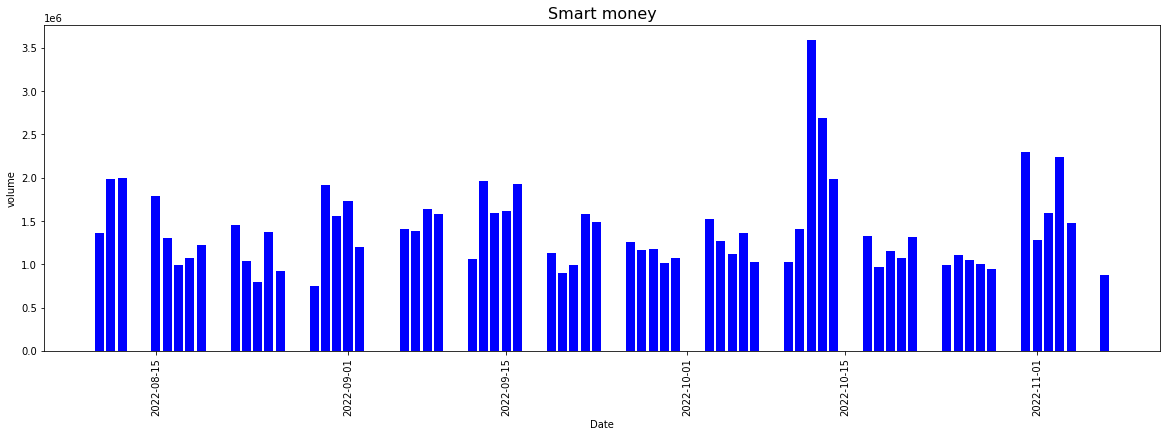

In [25]:
fig, ax=plt.subplots(figsize=(20,6))

ax.bar(earnings_history_three_months.index, earnings_history_three_months['volume'], color='b')
ax.set_xlabel('Date')
ax.set_ylabel('volume')
ax.set_title('Smart money', fontsize=16)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

#QUARTERLY REPORT

AVERAGE VALUE OF THE COMPANY AFTER THE END OF THREE MONTH

In [26]:
price_three_months_ago = earnings_history_three_months.open[0]
price_three_months_ago

249.99000549316406

In [27]:
price_yesterday = earnings_history_three_months.open[-1] 
price_yesterday

286.82000732421875

In [28]:
print(f"Average opening value: {earnings_history_three_months.open.mean():.2f}")  
print(f"Average daily value: {earnings_history_three_months.high.mean():.2f}") 
print(f"Average daily lowest value {earnings_history_three_months.low.mean():.2f}")
print(f"Average closing value: {earnings_history_three_months.close.mean():.2f}")
print(f"Percentage increase in the company's shares: {(price_yesterday-price_three_months_ago)/price_three_months_ago*100:.2f}" "%" )

Average opening value: 274.70
Average daily value: 280.90
Average daily lowest value 268.80
Average closing value: 275.72
Percentage increase in the company's shares: 14.73%


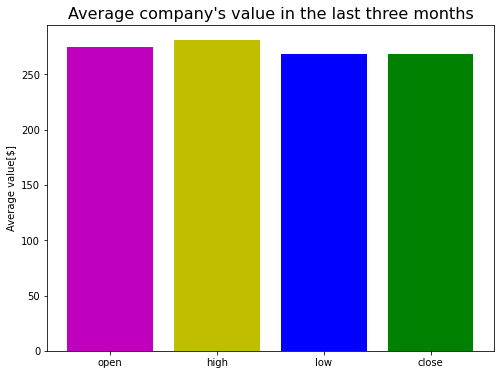

In [29]:
fig, ax=plt.subplots(figsize=(8,6))

ax.bar('open', earnings_history_three_months.open.mean(), color='m')   
ax.bar('high', earnings_history_three_months.high.mean(), color='y')  
ax.bar('low',  earnings_history_three_months.low.mean(), color='b')   
ax.bar('close', earnings_history_three_months.low.mean(), color='g')  

ax.set_ylabel('Average value[$]')
ax.set_ylim() 
ax.set_title("Average company's value in the last three months", fontsize=16)
plt.show()

**WE WILL SEE MORE WHAT THE PRICE IS SHAPING - AN IMAGE OF THE COMPANY'S PRICE DURING ONE MONTH**

In [30]:
one_month_ago = today - timedelta(days=30)
one_month_ago = one_month_ago.isoformat()

In [31]:
earnings_history_one_month = yh.get_data(name_max_day, one_month_ago , end_date, index_as_date = True)

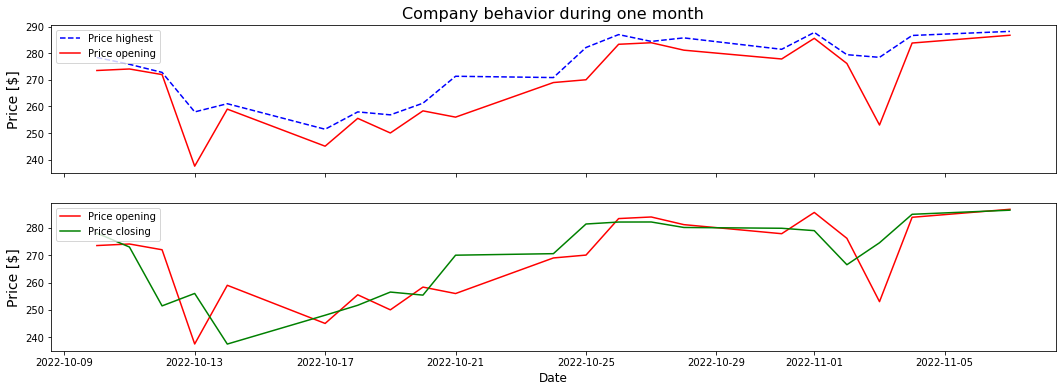

In [32]:
fig, ax=plt.subplots(2,1,sharey=False, figsize=(18,6))

ax[0].plot(earnings_history_one_month.index, earnings_history_one_month['high'], color='b', linestyle='--')
ax[0].plot(earnings_history_one_month.index, earnings_history_one_month['open'], color='r')

ax[1].plot(earnings_history_one_month.index, earnings_history_one_month['open'], color='r')
ax[1].plot(earnings_history_one_month.index, earnings_history_one_month['close'], color='g', linestyle='-')

ax[1].set_xlabel('Date',fontsize=12)

ax[0].set_ylabel('Price [$]',fontsize=14)
ax[1].set_ylabel('Price [$]',fontsize=14)

ax[0].set_title('Company behavior during one month', fontsize=16)

ax[0].set_xticklabels([])
ax[1].xaxis.set_tick_params(rotation=0)

ax[0].legend(["Price highest", "Price opening"], loc ="upper left")
ax[1].legend(["Price opening", "Price closing"], loc ="upper left")
plt.show()



**AVERAGE VALUE OF THE COMPANY AFTER THE END OF THE MONTH**

In [33]:
price_month_ego = earnings_history_one_month.open[0] 
price_month_ego

273.5400085449219

In [34]:
price_yesterday = earnings_history_one_month.open[-1] 
price_yesterday

286.82000732421875

In [35]:
print(f"Average opening value: {earnings_history_one_month.open.mean():.2f}")  
print(f"Average daily value: {earnings_history_one_month.high.mean():.2f}") 
print(f"Average daily lowest value {earnings_history_one_month.low.mean():.2f}")
print(f"Average closing value: {earnings_history_one_month.close.mean():.2f}")
print(f"Percentage increase in the company's shares: {(price_yesterday-price_month_ego)/price_month_ego*100:.2f}" "%" )

Average opening value: 268.19
Average daily value: 274.18
Average daily lowest value 261.09
Average closing value: 268.83
Percentage increase in the company's shares: 4.85%


# Exploratory Data Analysis

**Data Cleaning**

I will bring up a dataset

In [36]:
earnings_history_to_date = yh.get_data(name_max_day, start_day , end_date, index_as_date = False) 
df=pd.DataFrame(earnings_history_to_date)
df

,date,open,high,low,close,adjclose,volume,ticker
0,1999-07-16,9.656250,10.000000,9.500000,10.000000,6.873361,183400,ALB
1,1999-07-19,9.937500,10.000000,9.531250,9.843750,6.765958,180000,ALB
2,1999-07-20,9.781250,9.781250,9.468750,9.531250,6.551165,78400,ALB
3,1999-07-21,9.562500,9.562500,9.250000,9.375000,6.443772,376200,ALB
4,1999-07-22,9.312500,9.468750,8.875000,9.468750,6.508206,299600,ALB
...,...,...,...,...,...,...,...,...
5863,2022-11-01,285.660004,287.880005,278.890015,279.000000,279.000000,1276200,ALB
5864,2022-11-02,276.179993,279.500000,265.500000,266.519989,266.519989,1594800,ALB
5865,2022-11-03,253.000000,278.500000,250.500000,274.559998,274.559998,2240900,ALB
5866,2022-11-04,283.890015,286.739990,275.440002,284.989990,284.989990,1480500,ALB


I'll do open, high, low, close, adjclose prices - to two decimal places

In [37]:
df = df.round({'open': 2, 'high': 2, 'low': 2, 'close': 2, 'adjclose': 2})
df

,date,open,high,low,close,adjclose,volume,ticker
0,1999-07-16,9.66,10.00,9.50,10.00,6.87,183400,ALB
1,1999-07-19,9.94,10.00,9.53,9.84,6.77,180000,ALB
2,1999-07-20,9.78,9.78,9.47,9.53,6.55,78400,ALB
3,1999-07-21,9.56,9.56,9.25,9.38,6.44,376200,ALB
4,1999-07-22,9.31,9.47,8.88,9.47,6.51,299600,ALB
...,...,...,...,...,...,...,...,...
5863,2022-11-01,285.66,287.88,278.89,279.00,279.00,1276200,ALB
5864,2022-11-02,276.18,279.50,265.50,266.52,266.52,1594800,ALB
5865,2022-11-03,253.00,278.50,250.50,274.56,274.56,2240900,ALB
5866,2022-11-04,283.89,286.74,275.44,284.99,284.99,1480500,ALB


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      5868 non-null   datetime64[ns]
 1   open      5868 non-null   float64       
 2   high      5868 non-null   float64       
 3   low       5868 non-null   float64       
 4   close     5868 non-null   float64       
 5   adjclose  5868 non-null   float64       
 6   volume    5868 non-null   int64         
 7   ticker    5868 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 366.9+ KB


In [39]:
df.isnull().sum()

date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
ticker      0
dtype: int64

The dataset is doesn't have any null values.

Now, let's see if it contains any duplicated values or not.

In [40]:
print('Number of duplicate values are:')
df.duplicated().sum()

Number of duplicate values are:


0

There are no duplicated values and neither null values. It means that the dataset is already cleaned.

In [41]:
df.describe()

,open,high,low,close,adjclose,volume
count,5868.000000,5868.000000,5868.000000,5868.000000,5868.000000,5.868000e+03
mean,60.250358,61.147186,59.318073,60.270983,55.138809,8.739517e+05
std,55.425600,56.474587,54.304198,55.467699,56.017854,8.189423e+05
min,7.280000,7.500000,7.280000,7.280000,5.060000,1.860000e+04
25%,18.227500,18.397500,17.977500,18.217500,14.177500,3.581750e+05
50%,48.905000,49.940000,48.075000,48.930000,42.775000,7.183000e+05
75%,71.212500,71.865000,70.290000,71.225000,67.002500,1.172100e+06
max,302.150000,308.240000,295.100000,307.050000,306.650000,2.489550e+07


I WILL GO NOW TO CREATE A MODEL THAT PROVIDES US THE PRICE OF THE COMPANY, WE WILL ANSWER THE QUESTION, IS IT WORTH INVESTING IN THIS COMPANY?

I will use **AutoRegressive Integrated Moving Average** to create the model.

# Model Selection for Time Series Prediction

**Data splitting**


Time series models intrinsically introduce endogenous temporality, meaning that the values at any given point yt in our time series likely have some effect on some future value, yt+n. Therefore, we cannot simply split our data randomly; we must make a clean split in our time series (and exogenous variables, if present).

In [42]:
selected_day = df['date'].index[-1]
selected_day

5867

In [43]:
df['date'][selected_day]

Timestamp('2022-11-07 00:00:00')

#Train and Test split

In [63]:
train = df['close'][0:int(len(df)*0.8)]
test = df['close'][int(len(df)*0.8):]

train_ar = train.values
test_ar = test.values

In [64]:
len(train)

4694

In [46]:
len(test)

1174

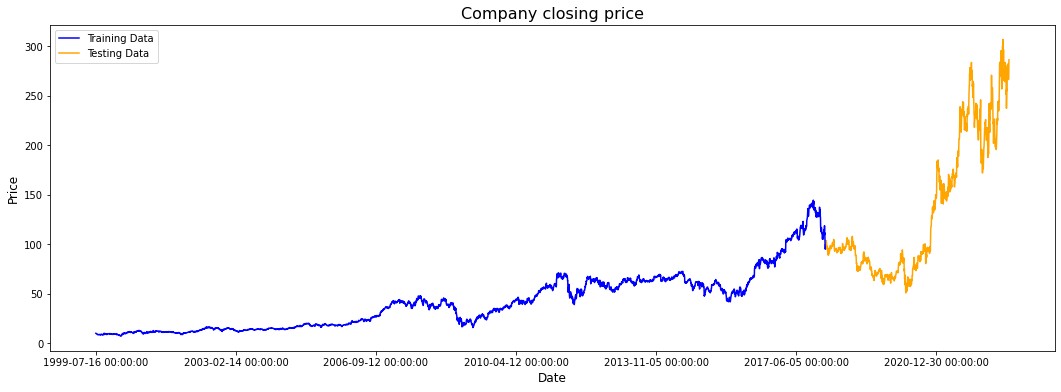

In [65]:
plt.figure(figsize=(18,6))
plt.title('Company closing price', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.plot(train, 'blue', label='Training Data')
plt.plot(test, 'orange', label='Testing Data')

plt.xticks(np.arange(0,5867, 900), df['date'][0:5867:900])
plt.legend()
plt.show()

#Pre-modeling analysis

**Autocorrelation with lag plots**

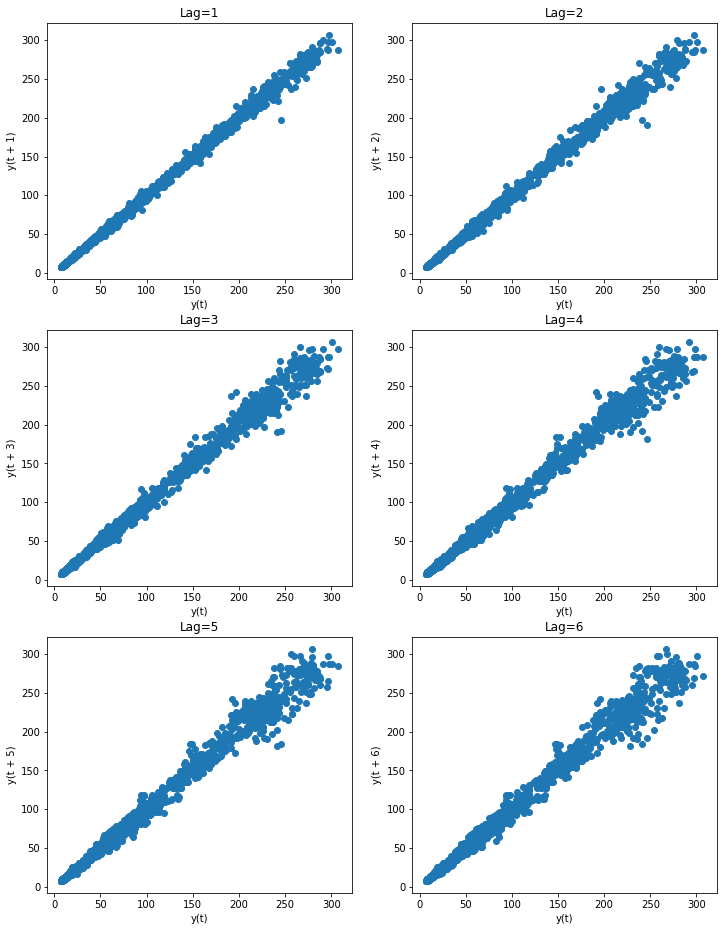

In [57]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

plt.title('Autocorrelation plot', fontsize=16)
# The axis coordinates for the plots
ax_idcs = [
    (0, 0),
    (0, 1),
    (1, 0),
    (1, 1),
    (2, 0),
    (2, 1)
]

for lag, ax_coords in enumerate(ax_idcs, 1):
    ax_row, ax_col = ax_coords
    axis = axes[ax_row][ax_col]
    lag_plot(df['close'], lag=lag, ax=axis)
    axis.set_title(f"Lag={lag}")

plt.show()

As you can see, all the lags look fairly linear, so it’s a good indicator that an auto-regressive model is a good choice.

But since I don’t want to allow simple visual bias to impact my decision here, I will allow the auto_arima to select the proper lag term.

I can estimate the best lag term with several statistical tests:

#Testing for stationarity

With pmdarima, I can run several time series differentiation tests to select the best number of differences so that the time series are stationary.

In [60]:
kpss_diffs = ndiffs(train_ar, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(train_ar, alpha=0.05, test='adf', max_d=6)

n_diffs = max(adf_diffs, kpss_diffs)

print(f"Estimated differencing term: {n_diffs}")

Estimated differencing term: 1


I will use d = n_diffs

#MODEL ARIMA (AutoRegressive Integrated Moving Average)

**Fitting model**

In [66]:
auto = pm.auto_arima(train_ar, d=n_diffs, seasonal=False, stepwise=True,
                     suppress_warnings=True, error_action="ignore", max_p=6,
                     max_order=None, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13013.672, Time=5.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13024.993, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13025.930, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13025.996, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13024.956, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13023.450, Time=6.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13029.885, Time=1.54 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13015.671, Time=4.01 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13015.670, Time=8.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13026.877, Time=2.38 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13021.909, Time=3.99 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13022.913, Time=6.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13017.664, Time=6.67 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=13013.552, Time=1.80 sec
 ARIMA(1,1,2)(0,0,0

Now that I have selected the model hyperparameters, I can update the model simulating the days passed with the test set. For each new observation, I will allow the model to evolve over several consecutive iterations, allowing MLE to update the parameters discovered and shift the last observed value. Then I will measure the error in the forecasts:

#Updating the model and Forecasting on the test data

In [70]:
model = auto  

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in test_ar:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)

print(f"Mean squared error: {mean_squared_error(test_ar, forecasts):.2f}")
print(f"SMAPE: {smape(test_ar, forecasts):.2f}")

Mean squared error: 22.03
SMAPE: 2.13


In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5868
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -13105.851
Date:                Tue, 08 Nov 2022   AIC                          26221.702
Time:                        17:55:41   BIC                          26255.087
Sample:                             0   HQIC                         26233.309
                               - 5868                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7246      0.040    -17.907      0.000      -0.804      -0.645
ar.L2         -0.8958      0.035    -25.583      0.000      -0.964      -0.827
ma.L1          0.7359      0.039     18.721      0.000       0.659       0.813
ma.L2          0.9026      0.034     26.337      0.000       0.835       0.970
sigma2         5.1030      0.018    276.108      0.000       5.067       5.139
===================================================================================
Ljung-Box (L1) (Q):                   3.07   Jarque-Bera (JB):            747601.01
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):             139.02   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        58.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#Viewing forecasts

Let’s take a look at the forecasts our model produces overlaid on the actuals (in the first plot), and the confidence intervals of the forecasts (in the second plot):

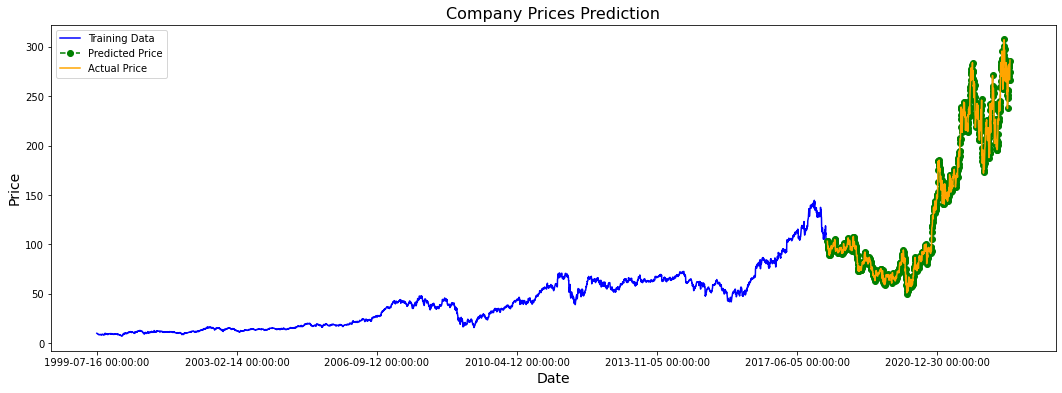

In [74]:
plt.figure(figsize=(18,6))

plt.title('Company Prices Prediction', fontsize=16)

plt.plot(train, color='blue', label='Training Data')
plt.plot(test.index, forecasts, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test.index, test, color='orange', label='Actual Price')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(np.arange(0,5867, 900).tolist(), df['date'][0:5867:900].tolist())
plt.legend()
plt.show()

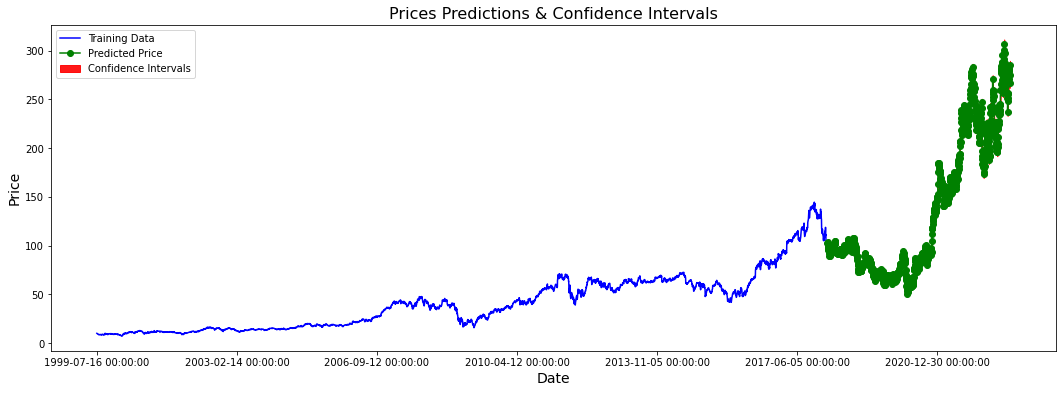

In [79]:
plt.figure(figsize=(18,6))

plt.title('Prices Predictions & Confidence Intervals', fontsize=16)

plt.plot(train, 'green', color='blue', label='Training Data')
plt.plot(test.index, forecasts, color='green', marker='o', label='Predicted Price')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)

conf_int = np.asarray(confidence_intervals)
plt.fill_between(test.index,
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.9, color='red',
                     label="Confidence Intervals")

plt.xticks(np.arange(0,5867, 900).tolist(), df['date'][0:5867:900].tolist())
plt.legend()
plt.show()

Enlarged version of the graph "Company Prices Prediction". From this can be noticed how the two curves closely follow each other. However, the predicted price seems to look like a “noisy” version of the actual price.

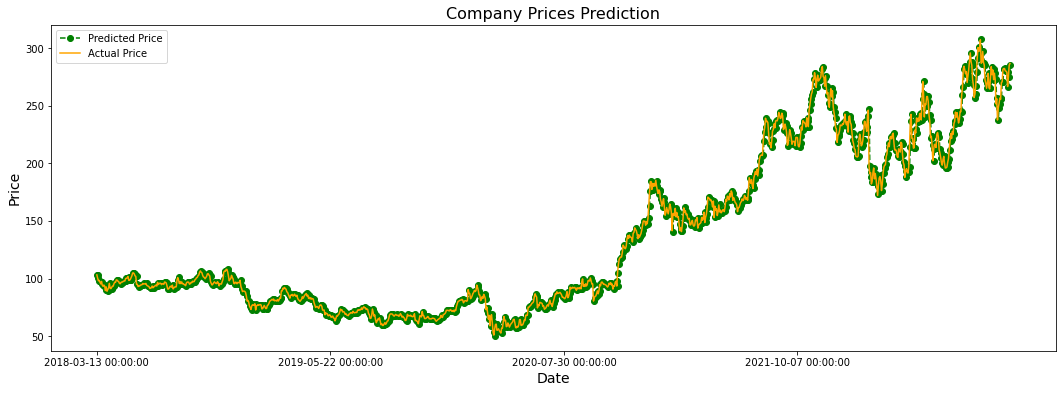

In [81]:
plt.figure(figsize=(18,6))

plt.plot(test.index, forecasts, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test.index, test, color='orange', label='Actual Price')

plt.title('Company Prices Prediction', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(np.arange(4694,5867, 300), df['date'][4694:5867:300])
plt.legend()
plt.show()

**Conclusion:**

This model demonstrated in fact to offer good prediction accuracy.

**Conclusion:**


**Would you invest in the above company - remember - the investment risk is associated with the inability to predict 100% what will happen with your investment in the future.**

**You will never invest without risk. A proven method of its reduction is the diversification of the portfolio held, which allows you to secure some of your funds. It is also worth acting in accordance with a well-thought-out investment strategy, the implementation of which will bring you closer to the overarching goal - profit.**


